# Project 1: Classification Analysis on Textual Data
## Akhil Avula, Berkin Durmus, Vivek Krishnamurthy, Meet Taraviya 
ECE 219 Winter 2020 \\
Prof.  Vwani Roychowdhury \\
UCLA, Department of ECE
 

# Getting familiar with the dataset


# Question 1

In [0]:
from sklearn.datasets import fetch_20newsgroups
newsgroups_train_all = fetch_20newsgroups(subset='train')
newsgroups_test_all = fetch_20newsgroups(subset='test')

In [0]:
# from google.colab import drive

# drive.mount('/content/drive/')

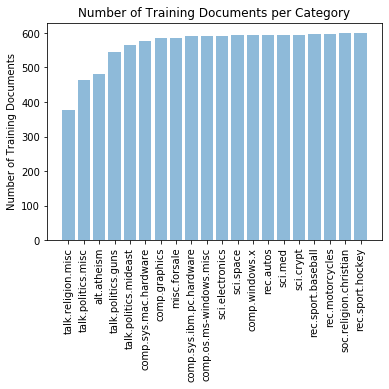

In [0]:
import matplotlib.pyplot as plt

from collections import Counter
import operator

targets = newsgroups_train_all.target
target_names = newsgroups_train_all.target_names
target_frequency = Counter(targets)
target_frequency = sorted(target_frequency.items(), key=operator.itemgetter(1))
labels = []
freqs = []

for e in target_frequency:
    labels.append(target_names[e[0]])
    freqs.append(e[1])
# print(X)
# print(Y)

plt.bar(labels, freqs, align='center', alpha=0.5)
plt.xticks(rotation=90)
plt.ylabel("Number of Training Documents")
plt.title("Number of Training Documents per Category")

plt.show()

# Binary Classification


# Question 2: Feature Extraction

In [0]:
import numpy as np
np.random.seed(42)
import random
random.seed(42)

In [0]:
categories = ['comp.graphics', 'comp.os.ms-windows.misc',
'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware',
'rec.autos', 'rec.motorcycles',
'rec.sport.baseball', 'rec.sport.hockey']
train_dataset = fetch_20newsgroups(subset = 'train', categories = categories, shuffle = True, random_state = None)
test_dataset = fetch_20newsgroups(subset = 'test', categories = categories, shuffle = True, random_state = None)

computer_tech = ['comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware']
recreational = ['rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey']

targets = train_dataset.target
target_names = test_dataset.target_names
test_targets = test_dataset.target

binary_targets_train = [1 if target_names[i] in computer_tech else 0 for i in train_dataset.target]
binary_targets_test = [1 if target_names[i] in computer_tech else 0 for i in test_dataset.target]

In [0]:
import re
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize
from nltk import pos_tag
import nltk
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('omw')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package omw to /root/nltk_data...
[nltk_data]   Package omw is already up-to-date!


True

In [0]:
lemmatizer = WordNetLemmatizer()
stop_words = set(nltk.corpus.stopwords.words('english'))

def no_num_tokenizer(document):
    unlemmatized_words = [word for word in re.split('[^a-zA-Z]+', document) if len(word)>2]
    # unlemmatized_words = [word for word in nltk.word_tokenize(document) if not word.strip('+').strip('-').replace('.','').isdigit()]
    words = [lemmatizer.lemmatize(word) for word in unlemmatized_words if word not in stop_words]
    return words

from nltk.corpus import wordnet

def get_wordnet_pos(treebank_tag):

    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

def no_num_tokenizer_new(document):
    unlemmatized_words = [word for word in re.split('[^a-zA-Z]+', document) if len(word)>2]
    pos_tagged_unlemmatizzed_words = nltk.pos_tag(unlemmatized_words)
    lemmatized_words = [lemmatizer.lemmatize(word,get_wordnet_pos(tag)) for word,tag in pos_tagged_unlemmatizzed_words]
    # unlemmatized_words = [word for word in nltk.word_tokenize(document) if not word.strip('+').strip('-').replace('.','').isdigit()]
    words = [word for word in lemmatized_words if word not in stop_words]
    # print(words)
    return words

In [0]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from nltk.stem import WordNetLemmatizer


# vectorizer = CountVectorizer(stop_words=None, tokenizer=no_num_tokenizer, min_df=3)
vectorizer = CountVectorizer(stop_words=None, tokenizer=no_num_tokenizer_new, min_df=3)
tf_train = vectorizer.fit_transform(train_dataset.data).toarray()

tf_test = vectorizer.transform(test_dataset.data).toarray()
print(tf_train.shape)

(4732, 14222)


In [0]:
# df_train = (tf_train>0).sum(axis=0).flatten()
# idf_train = np.log(tf_train.shape[0]/df_train)+1

# df_test = (tf_test>0).sum(axis=0).flatten()

# tf_idf_train = np.multiply(tf_train, idf_train)
# tf_idf_test = np.multiply(tf_test, idf_train)

tfidfer = TfidfTransformer()
tf_idf_train = tfidfer.fit_transform(tf_train).toarray()
tf_idf_test = tfidfer.transform(tf_test).toarray()

In [0]:
type(tf_idf_train)

numpy.ndarray

# Question 3: Dimensionality Reduction

## LSI Reduction


In [0]:
from sklearn.decomposition import randomized_svd
from numpy.linalg import norm

X_train = tf_idf_train
X_test = tf_idf_test

k = 50

#LSI
U, Sigma, VT = randomized_svd(X_train, n_components=k, random_state=None)
X_test_lsi = X_test.dot(VT.T)
X_train_lsi = X_train.dot(VT.T)
X_train_lsi_norm = norm(X_train-U.dot(np.diag(Sigma)).dot(VT), ord='fro')

print('LSI reduced trained data:')
print(X_train_lsi.shape)
print('LSI reduced test data:')
print(X_test_lsi.shape)
print('LSI reconstruction error:')
print(X_train_lsi_norm)
print('')

LSI reduced trained data:
(2352, 50)
LSI reduced test data:
(1565, 50)
LSI reconstruction error:
43.869753937721654



In [0]:
X_train_lsi.shape

(4732, 50)

## NMF Reduction

In [0]:
from sklearn.decomposition import NMF

nmf_model = NMF(n_components=k, random_state=None)
W = nmf_model.fit_transform(X_train) # X_train_nmf
H = nmf_model.components_

X_train_nmf = W
X_test_nmf = nmf_model.transform(X_test)
X_train_nmf_norm = norm(X_train-W.dot(H), ord='fro')
print('NMF reduced trained Data:')
print(X_train_nmf.shape)
print('NMF reduced test Data:')
print(X_test_nmf.shape)
print('NMF reconstruction error:')
print(X_train_nmf_norm)
print('')

NMF reduced trained Data:
(4732, 50)
NMF reduced test Data:
(3150, 50)
NMF reconstruction error:
64.27890540556714



In [0]:
X_train_nmf.shape

(4732, 50)

In [0]:
X_train_reduced = X_train.dot(VT.T)
X_test_reduced = X_test.dot(VT.T)

# Question 4: SVM

In [0]:
#Problem 4 SVM
#from sklearn.svm import SVC
from sklearn.svm import LinearSVC

Train_X = X_train
Train_Y = binary_targets_train
Test_X = X_test
Test_Y = binary_targets_test

#Training of SVM with original untransformed dataset
#full_svm = SVC(C = 1, max_iter=100)
full_svm = LinearSVC(C = 1, max_iter=100)
full_svm.fit(Train_X, Train_Y)
print("SVM Test accuracy without LSI:")
print(full_svm.score(Test_X, Test_Y))
print("SVM Train accuracy without LSI:")
print(full_svm.score(Train_X, Train_Y))


SVM Test accuracy without LSI:
0.9815873015873016
SVM Train accuracy without LSI:
1.0


In [0]:
Train_X = X_train_reduced
Train_Y = binary_targets_train
Test_X = X_test_reduced
Test_Y = binary_targets_test

In [0]:
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_curve
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import auc
from sklearn.metrics import confusion_matrix
import pandas as pd

import seaborn as sn


def analyze(model, model_name, train_x, train_y, test_x, test_y):
    print()
    print("*** Model evaluation START for:", model_name, "***")
    predicted_y = model.predict(test_x)
    try:
      scores_y = model.decision_function(test_x)
      fpr, tpr, thresholds = roc_curve(test_y, scores_y)
    except AttributeError:
      scores_y = model.predict_proba(test_x)
      fpr, tpr, thresholds = roc_curve(test_y, scores_y[:,1])
    
    conf_matrix = confusion_matrix(test_y, predicted_y)

    
    au_roc = auc(fpr, tpr)

    print()
    print("Train accuracy:  %6.2f %%" % (100*model.score(train_x, train_y)))
    print("Test accuracy:   %6.2f %%" % (100*model.score(test_x, test_y)))
    print("Precision:       %6.2f %%" % (100*precision_score(test_y, predicted_y)))
    print("Recall:          %6.2f %%" % (100*recall_score(test_y, predicted_y)))
    print("F1 score:        %6.2f %%" % (100*f1_score(test_y, predicted_y)))
    print("Area under ROC:  %6.2f" % (au_roc))
    print("""
Confusion matrix:

                 Predicted label
                |    0   |    1
            ----+--------+--------
             0  |  %4d  |  %4d
True label  ----+--------+--------
             1  |  %4d  |  %4d
"""%tuple(conf_matrix.flatten()))
    print()

    train_acc = round(100*model.score(train_x, train_y), 2)
    test_acc = round(100*model.score(test_x, test_y), 2)
    precision = round(100*precision_score(test_y, predicted_y), 2)
    recall = round(100*recall_score(test_y, predicted_y), 2)
    f1_value = round(100*f1_score(test_y, predicted_y), 2)
    au_roc = round(au_roc, 2)
    metrics = [model_name, train_acc, test_acc, precision, recall, f1_value, au_roc]
    row = " & ".join([str(s) for s in metrics])
    print(row + "\\\\ \\hline")

    # plt.xlabel("False postive rate")
    # plt.ylabel("True positive rate")
    # plt.plot(fpr, tpr)
    plot_roc_curve(model, test_x, test_y)
    # plt.savefig("drive/My Drive/EC219/" + model_name + "_ROC.png", bbox_inches='tight', dpi=400)
    plt.show()
    # plt.close()


    df_cm = pd.DataFrame(conf_matrix, range(2), range(2))
    sn.set(font_scale=1.4) # for label size
    sn.heatmap(df_cm, annot=df_cm, fmt='d', annot_kws={"size": 16}) # font size
    plt.xlabel("Predicted labels")
    plt.ylabel("True labels")
    # plt.savefig("drive/My Drive/EC219/" + model_name + "_CM.png", bbox_inches='tight', dpi=400)
    #plt.savefig(model_name + " [CM].png", bbox_inches='tight', dpi=400)
    plt.show()
    # plt.close()

    print("*** Model evaluation END for:", model_name, "***")

### Run after running the rest of the code
# analyze(soft_svm, "Soft_SVM", Train_X, Train_Y, Test_X, Test_Y)
# analyze(hard_svm, "Hard_SVM", Train_X, Train_Y, Test_X, Test_Y)
# analyze(best_classifier, "Best_SVM_C={:.0e}".format(best_C), Train_X, Train_Y, Test_X, Test_Y)
# analyze(logistic_model_noreg, "Logistic_Regression_no_reg", Train_X, Train_Y, Test_X, Test_Y)
# analyze(best_logistic_model_l2, "Best_Logistic_Regression_L2_reg", Train_X, Train_Y, Test_X, Test_Y)
# analyze(best_logistic_model_l1, "Best_Logistic_Regression_L1_reg", Train_X, Train_Y, Test_X, Test_Y)
# analyze(GaussianNB_m, "GaussianNB", Train_X, Train_Y, Test_X, Test_Y)

# Soft SVM


*** Model evaluation START for: Soft SVM ***

Train accuracy:   68.85 %
Test accuracy:    67.87 %
Precision:       100.00 %
Recall:           35.13 %
F1 score:         51.99 %
Area under ROC:    0.99

Confusion matrix:

                 Predicted label
                |    0   |    1
            ----+--------+--------
             0  |  1590  |     0
True label  ----+--------+--------
             1  |  1012  |   548


Soft SVM & 68.85 & 67.87 & 100.0 & 35.13 & 51.99 & 0.99\\ \hline


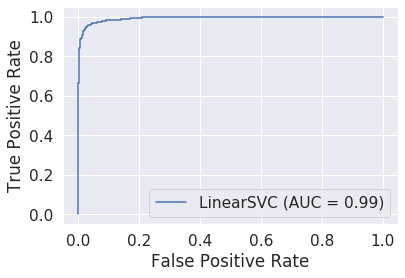

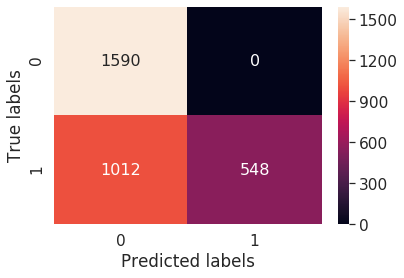

*** Model evaluation END for: Soft SVM ***


In [0]:
soft_svm = LinearSVC(C = 0.0001)
soft_svm.fit(Train_X, Train_Y)
analyze(soft_svm, "Soft SVM", Train_X, Train_Y, Test_X, Test_Y)

# Hard SVM


*** Model evaluation START for: Hard SVM ***

Train accuracy:   97.76 %
Test accuracy:    97.24 %
Precision:        97.73 %
Recall:           96.67 %
F1 score:         97.20 %
Area under ROC:    1.00

Confusion matrix:

                 Predicted label
                |    0   |    1
            ----+--------+--------
             0  |  1555  |    35
True label  ----+--------+--------
             1  |    52  |  1508


Hard SVM & 97.76 & 97.24 & 97.73 & 96.67 & 97.2 & 1.0\\ \hline


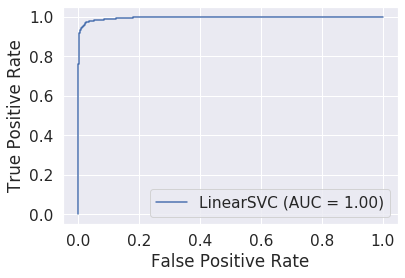

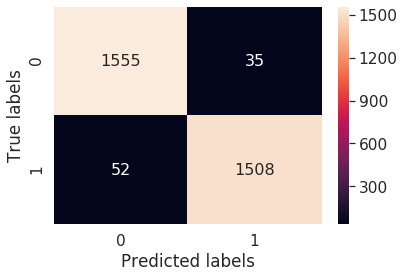

*** Model evaluation END for: Hard SVM ***


In [0]:
hard_svm = LinearSVC(C = 1000)
hard_svm.fit(Train_X, Train_Y)
analyze(hard_svm, "Hard SVM", Train_X, Train_Y, Test_X, Test_Y)

# Best SVM

In [0]:
from sklearn.model_selection import KFold

best_score = 0.0

best_C = None
best_classifier = None

binary_targets_train = np.array(binary_targets_train)

for i in range(-3, 4, 1):

    scores = []
    C = pow(10, i)
    kf = KFold(n_splits=5)
    for train_index, test_index in kf.split(Train_X):
        X_train, X_test = Train_X[train_index], Train_X[test_index]
        y_train, y_test = binary_targets_train[train_index], binary_targets_train[test_index]
        clf = LinearSVC(C = C)
        clf.fit(X_train, y_train)
        scores.append(clf.score(X_test, y_test))
    average_score = np.mean(scores)
    # print(str(C) + " & "  + str(round(average_score, 3)) + "\\\\ \\hline")
    print("C =", C, "| Mean cross validation accuracy:", average_score)
    if average_score > best_score:
        best_score = average_score
        best_C = C
        best_classifier = clf
  

C = 0.001 | Mean cross validation accuracy: 0.9144348125046046
C = 0.01 | Mean cross validation accuracy: 0.9640728147862058
C = 0.1 | Mean cross validation accuracy: 0.9689327150833499
C = 1 | Mean cross validation accuracy: 0.9723144859364501
C = 10 | Mean cross validation accuracy: 0.9742165646048164
C = 100 | Mean cross validation accuracy: 0.9742165646048162
C = 1000 | Mean cross validation accuracy: 0.9725263489242764


Value of C giving best cross validation score: 100
Best SVM cross validation score: 0.9748505908276052

*** Model evaluation START for: Best SVM (C = 1.0e+02) ***

Train accuracy:   97.82 %
Test accuracy:    97.05 %
Precision:        97.97 %
Recall:           96.03 %
F1 score:         96.99 %
Area under ROC:    1.00

Confusion matrix:

                 Predicted label
                |    0   |    1
            ----+--------+--------
             0  |  1559  |    31
True label  ----+--------+--------
             1  |    62  |  1498


Best SVM (C = 1.0e+02) & 97.82 & 97.05 & 97.97 & 96.03 & 96.99 & 1.0\\ \hline


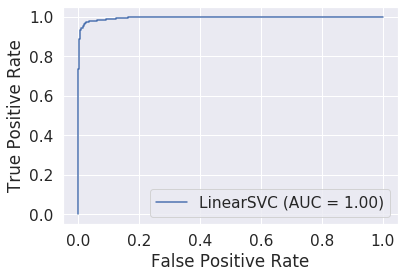

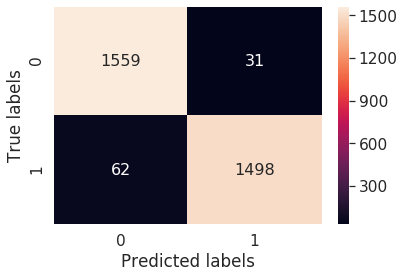

*** Model evaluation END for: Best SVM (C = 1.0e+02) ***


In [0]:
print("Value of C giving best cross validation score:", best_C)
print("Best SVM cross validation score:", best_score)
analyze(best_classifier, "Best SVM (C = {:.1e})".format(best_C), Train_X, Train_Y, Test_X, Test_Y)

# Question 5: Logistic Regression


*** Model evaluation START for: Logistic Regression (no reg) ***

Train accuracy:   97.82 %
Test accuracy:    97.02 %
Precision:        97.66 %
Recall:           96.28 %
F1 score:         96.97 %
Area under ROC:    1.00

Confusion matrix:

                 Predicted label
                |    0   |    1
            ----+--------+--------
             0  |  1554  |    36
True label  ----+--------+--------
             1  |    58  |  1502


Logistic Regression (no reg) & 97.82 & 97.02 & 97.66 & 96.28 & 96.97 & 1.0\\ \hline


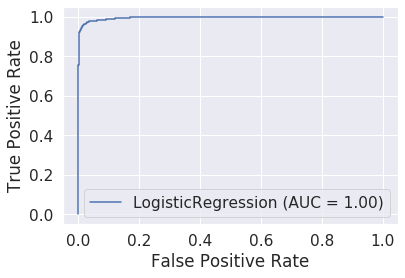

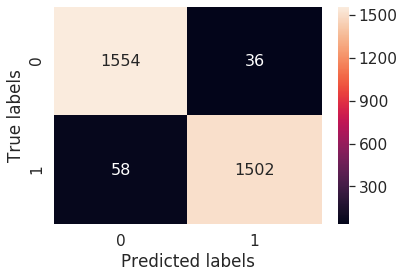

*** Model evaluation END for: Logistic Regression (no reg) ***


In [0]:
from sklearn.linear_model import LogisticRegression

logistic_model_noreg = LogisticRegression(C=1.0e15, max_iter=1000)
logistic_model_noreg.fit(Train_X, Train_Y)
analyze(logistic_model_noreg, "Logistic Regression (no reg)", Train_X, Train_Y, Test_X, Test_Y)

In [0]:
import warnings
warnings.filterwarnings('ignore')

kf = KFold(n_splits=5)

score_for_C_l2 = {}

Train_X = np.array(Train_X)
Train_Y = np.array(Train_Y)

for C in np.geomspace(1e-3,1e3, num=7):
    
    kf_scores = []
    
    for train_ix, test_ix in kf.split(Train_X):
        logistic_model = LogisticRegression(C=C, max_iter=1000)
        logistic_model.fit(Train_X[train_ix], Train_Y[train_ix])
        kf_scores.append(logistic_model.score(Train_X[test_ix], Train_Y[test_ix]))
        
    score_for_C_l2[C] = np.mean(kf_scores)
    # print(str(C) + " & "  + str(round(score_for_C_l2[C], 3)) + "\\\\ \\hline")
    print("C =", C, "| Mean cross validation accuracy:", score_for_C_l2[C])
    #print("Score for C =",C,":",score_for_C_l2[C])

C = 0.001 | Mean cross validation accuracy: 0.5779894671277496
C = 0.01 | Mean cross validation accuracy: 0.9195034503081947
C = 0.1 | Mean cross validation accuracy: 0.9644956477671783
C = 1.0 | Mean cross validation accuracy: 0.9689327150833499
C = 10.0 | Mean cross validation accuracy: 0.9733711218915413
C = 100.0 | Mean cross validation accuracy: 0.973794178121184
C = 1000.0 | Mean cross validation accuracy: 0.9744284275926427


In [0]:
best_C_l2 = max(score_for_C_l2.keys(),key=score_for_C_l2.get)
print("Best value of lambda for L2:", 1/best_C_l2)

best_logistic_model_l2 = LogisticRegression(C=best_C_l2, max_iter=1000)
best_logistic_model_l2.fit(Train_X, Train_Y)
print("Test accuracy for best value of lambda for L2:", best_logistic_model_l2.score(Test_X, Test_Y))

Best value of lambda for L2: 0.001
Test accuracy for best value of lambda for L2: 0.9695238095238096



*** Model evaluation START for: Best Logistic Regression (L2 reg, C = 1.0e+03) ***

Train accuracy:   97.82 %
Test accuracy:    96.95 %
Precision:        97.66 %
Recall:           96.15 %
F1 score:         96.90 %
Area under ROC:    1.00

Confusion matrix:

                 Predicted label
                |    0   |    1
            ----+--------+--------
             0  |  1554  |    36
True label  ----+--------+--------
             1  |    60  |  1500


Best Logistic Regression (L2 reg, C = 1.0e+03) & 97.82 & 96.95 & 97.66 & 96.15 & 96.9 & 1.0\\ \hline


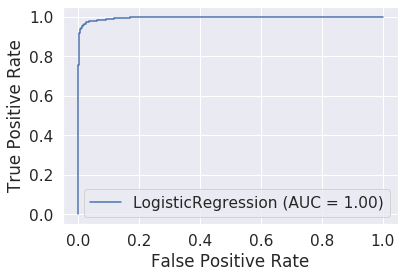

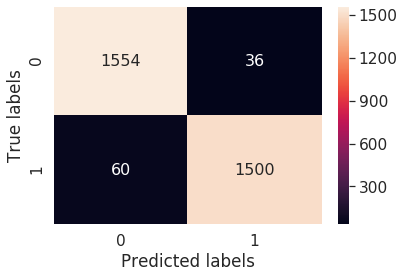

*** Model evaluation END for: Best Logistic Regression (L2 reg, C = 1.0e+03) ***


In [0]:
analyze(best_logistic_model_l2, "Best Logistic Regression (L2 reg, C = {:.1e})".format(best_C_l2), Train_X, Train_Y, Test_X, Test_Y)

In [0]:
for C in np.geomspace(1e-3,1e3, num=7):

    logistic_model = LogisticRegression(C=C, max_iter=1000)
    logistic_model.fit(Train_X, Train_Y)
    # print("Logistic regression with L2 regularization, C = {}:".format(C))
    # print("Test accuracy:", logistic_model.score(Test_X, Test_Y))
    # print("Norm of coefficients:", norm(logistic_model.coef_))
    # print(str(C) + " & "  + str(round(logistic_model.score(Test_X, Test_Y), 3)) + "\\\\ \\hline")
    print("C =", C, "| Test accuracy:", logistic_model.score(Test_X, Test_Y))
    # print()


C = 0.001 | Test accuracy: 0.5628571428571428
C = 0.01 | Test accuracy: 0.9396825396825397
C = 0.1 | Test accuracy: 0.9622222222222222
C = 1.0 | Test accuracy: 0.9666666666666667
C = 10.0 | Test accuracy: 0.9704761904761905
C = 100.0 | Test accuracy: 0.9707936507936508
C = 1000.0 | Test accuracy: 0.9695238095238096


In [0]:
kf = KFold(n_splits=5)

score_for_C_l1 = {}


for C in np.geomspace(1e-3,1e3, num=7):
    
    kf_scores = []
    
    for train_ix, test_ix in kf.split(Train_X):
        logistic_model = LogisticRegression(C=C, max_iter=1000, penalty='l1', solver='saga')
        logistic_model.fit(Train_X[train_ix], Train_Y[train_ix])
        kf_scores.append(logistic_model.score(Train_X[test_ix], Train_Y[test_ix]))
    
    score_for_C_l1[C] = np.mean(kf_scores)
    # print("Score for C=",C,":",score_for_C_l1[C])
    # print(str(C) + " & "  + str(round(score_for_C_l1[C], 3)) + "\\\\ \\hline")
    print("C =", C, "| Mean cross validation accuracy:", score_for_C_l1[C])

C = 0.001 | Mean cross validation accuracy: 0.5164744123536884
C = 0.01 | Mean cross validation accuracy: 0.9002638799279353
C = 0.1 | Mean cross validation accuracy: 0.963438788563417
C = 1.0 | Mean cross validation accuracy: 0.9697790507913048
C = 10.0 | Mean cross validation accuracy: 0.9733711218915413
C = 100.0 | Mean cross validation accuracy: 0.9744284275926427
C = 1000.0 | Mean cross validation accuracy: 0.9744282043439727


In [0]:
best_C_l1 = max(score_for_C_l1.keys(),key=score_for_C_l1.get)
print("Best value of lambda for l1:", 1/best_C_l1)

best_logistic_model_l1 = LogisticRegression(C=best_C_l1, max_iter=1000, penalty='l1', solver='saga')
best_logistic_model_l1.fit(Train_X, Train_Y)
print("Test accuracy for best value of lambda for l1:", best_logistic_model_l1.score(Test_X, Test_Y))

Best value of lambda for l1: 0.01
Test accuracy for best value of lambda for l1: 0.9698412698412698



*** Model evaluation START for: Best Logistic Regression (L1 reg, C = 1.0e+02) ***

Train accuracy:   97.82 %
Test accuracy:    96.98 %
Precision:        97.66 %
Recall:           96.22 %
F1 score:         96.93 %
Area under ROC:    1.00

Confusion matrix:

                 Predicted label
                |    0   |    1
            ----+--------+--------
             0  |  1554  |    36
True label  ----+--------+--------
             1  |    59  |  1501


Best Logistic Regression (L1 reg, C = 1.0e+02) & 97.82 & 96.98 & 97.66 & 96.22 & 96.93 & 1.0\\ \hline


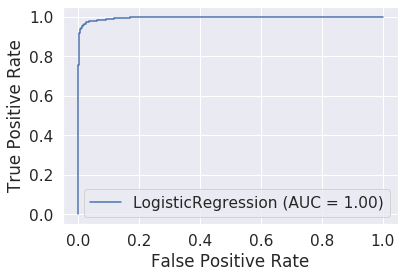

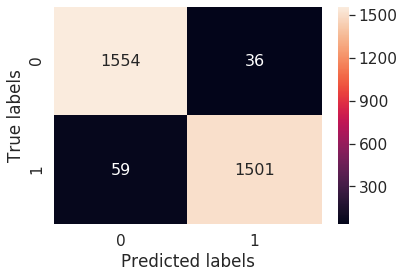

*** Model evaluation END for: Best Logistic Regression (L1 reg, C = 1.0e+02) ***


In [0]:
analyze(best_logistic_model_l1, "Best Logistic Regression (L1 reg, C = {:.1e})".format(best_C_l1), Train_X, Train_Y, Test_X, Test_Y)

In [0]:
for C in np.geomspace(1e-3,1e3, num=7):

    logistic_model = LogisticRegression(C=C, max_iter=1000, penalty='l1', solver='saga')
    logistic_model.fit(Train_X, Train_Y)
    # print("Logistic regression with L1 regularization, C = {}:".format(C))
    # print("Test accuracy:", logistic_model.score(Test_X, Test_Y))
    # print("Norm of coefficients:", norm(logistic_model.coef_))
    # print(str(C) + " & "  + str(round(logistic_model.score(Test_X, Test_Y), 10)) + "\\\\ \\hline")
    print("C =", C, "| Test accuracy:", logistic_model.score(Test_X, Test_Y))


C = 0.001 | Test accuracy: 0.5047619047619047
C = 0.01 | Test accuracy: 0.9047619047619048
C = 0.1 | Test accuracy: 0.9517460317460318
C = 1.0 | Test accuracy: 0.9653968253968254
C = 10.0 | Test accuracy: 0.9714285714285714
C = 100.0 | Test accuracy: 0.9698412698412698
C = 1000.0 | Test accuracy: 0.9701587301587301


# Question 6: Naïve Bayes classifier

In [0]:
from sklearn.naive_bayes import GaussianNB
GaussianNB_m = GaussianNB()
GaussianNB_m.fit(Train_X,Train_Y)

GaussianNB(priors=None, var_smoothing=1e-09)


*** Model evaluation START for: GaussianNB ***

Train accuracy:   92.16 %
Test accuracy:    92.00 %
Precision:        96.45 %
Recall:           87.05 %
F1 score:         91.51 %
Area under ROC:    0.98

Confusion matrix:

                 Predicted label
                |    0   |    1
            ----+--------+--------
             0  |  1540  |    50
True label  ----+--------+--------
             1  |   202  |  1358


GaussianNB & 92.16 & 92.0 & 96.45 & 87.05 & 91.51 & 0.98\\ \hline


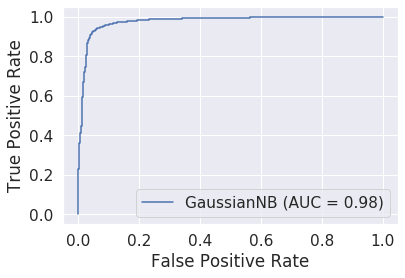

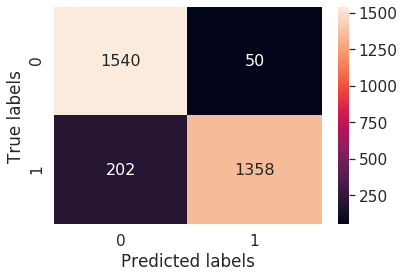

*** Model evaluation END for: GaussianNB ***


In [0]:
analyze(GaussianNB_m, "GaussianNB", Train_X, Train_Y, Test_X, Test_Y)

# Question 7: Grid Search of Parameters

(Code attached separately in `pipeline.py`)

In [0]:
# from sklearn.linear_model import LogisticRegression
# from sklearn.naive_bayes import GaussianNB
# from sklearn.svm import SVC

# from sklearn.pipeline import Pipeline

# from sklearn.decomposition import TruncatedSVD
# from sklearn.decomposition import NMF

# from sklearn.datasets import fetch_20newsgroups
# from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
# from nltk.stem import WordNetLemmatizer
# from sklearn.model_selection import GridSearchCV
# from sklearn.svm import LinearSVC
# import seaborn as sn
# from sklearn.base import BaseEstimator, TransformerMixin

# import numpy as np

# from nltk.corpus import wordnet

# import re
# from nltk.stem import WordNetLemmatizer
# from nltk import word_tokenize
# from nltk import pos_tag
# import nltk
# nltk.download('wordnet')
# nltk.download('stopwords')
# nltk.download('punkt')
# nltk.download('averaged_perceptron_tagger')
# nltk.download('omw')

In [0]:
# # svc_C = best_C
# # best_l1_C = best_C_l1
# # best_l2_C = best_C_l2

# svc_C = 100
# best_l1_C = 100
# best_l2_C = 1000

# categories = ['comp.graphics', 'comp.os.ms-windows.misc',
# # 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware',
# # 'rec.autos', 'rec.motorcycles',
# # 'rec.sport.baseball', 'rec.sport.hockey']


# newsgroups_train_whf = fetch_20newsgroups(subset='train', categories=categories)
# newsgroups_test_whf = fetch_20newsgroups(subset='test', categories=categories)

# newsgroups_train_wohf = fetch_20newsgroups(subset='train', remove=("headers", "footers"), categories=categories)
# newsgroups_test_wohf = fetch_20newsgroups(subset='test', remove=("headers", "footers"), categories=categories)

# targets = newsgroups_train_whf.target
# target_names = newsgroups_train_whf.target_names


# computer_tech = ['comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware']
# recreational = ['rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey']

# Y_train = np.array([1.0 if target_names[i] in computer_tech else 0.0 for i in newsgroups_train_whf.target])
# Y_test = np.array([1.0 if target_names[i] in computer_tech else 0.0 for i in newsgroups_test_whf.target])

# lemmatizer = WordNetLemmatizer()
# stop_words = set(nltk.corpus.stopwords.words('english'))

# def get_wordnet_pos(treebank_tag):
#     if treebank_tag.startswith('J'):
#         return wordnet.ADJ
#     elif treebank_tag.startswith('V'):
#         return wordnet.VERB
#     elif treebank_tag.startswith('N'):
#         return wordnet.NOUN
#     elif treebank_tag.startswith('R'):
#         return wordnet.ADV
#     else:
#         return wordnet.NOUN

# wordnet_tag = {
#     'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV,
# }

# def no_num_tokenizer_no_lem(document):
#     unlemmatized_words = [word for word in re.split('[^a-zA-Z]+', document) if len(word)>2]
#     words = [word for word in unlemmatized_words if word not in stop_words]
#     return words

# def no_num_tokenizer(document):
#     unlemmatized_words = [word for word in re.split('[^a-zA-Z]+', document) if len(word)>2]
#     pos_tagged_unlemmatizzed_words = nltk.pos_tag(unlemmatized_words)
#     lemmatized_words = [lemmatizer.lemmatize(word,wordnet_tag.get(tag[0], wordnet.NOUN)) for word,tag in pos_tagged_unlemmatizzed_words]
#     words = [lemmatizer.lemmatize(word) for word in unlemmatized_words if word not in stop_words]
#     return words

# class MyVectorizer(CountVectorizer):

#     def __init__(self, lemmatize=None, min_df=None):
#       if lemmatize:
#         super().__init__(min_df=min_df, stop_words=None, tokenizer=no_num_tokenizer)
#       else:
#         super().__init__(min_df=min_df, stop_words=None, tokenizer=no_num_tokenizer_no_lem)
    
#     def set_params(self, lemmatize=None, min_df=None):
#       if lemmatize:
#         super().__init__(min_df=min_df, stop_words=None, tokenizer=no_num_tokenizer)
#       else:
#         super().__init__(min_df=min_df, stop_words=None, tokenizer=no_num_tokenizer_no_lem)
    
    
   
# class MyDimReduction(BaseEstimator, TransformerMixin):

#     def __init__(self, method=None):
#       if method == 'lsi':
#         model = TruncatedSVD(n_components=50, random_state=None)
#       elif method == 'nmf':
#         model = NMF(n_components=50, random_state=None)
#       else:
#         return
#       self.method = method
#       self.fit = model.fit
#       self.transform = model.transform
#       self.fit_transform = model.fit_transform
    
#     def set_params(self, method=None):
#       if method == 'lsi':
#         model = TruncatedSVD(n_components=50, random_state=None)
#       elif method == 'nmf':
#         model = NMF(n_components=50, random_state=None)
#       else:
#         return
#       self.method = method
#       self.fit = model.fit
#       self.transform = model.transform
#       self.fit_transform = model.fit_transform
    
#     def get_params(self, deep=True):
#       return {"method":self.method}


# class MyModel():
#      def __init__(self, algo=None):
#         if algo == 'gnb':
#           model = GaussianNB()
#         elif algo == 'lrl2':
#           model = LogisticRegression(C=best_C_l2, penalty='l2')
#         elif algo == 'lrl1':
#           model = LogisticRegression(C=best_C_l1, penalty='l1', solver='saga')
#         elif algo == 'svm':
#           model = SVC(C=svc_C)
#         else:
#           model = None
        
#         self.algo = algo
#         self.fit = model.fit
#         self.score = model.score
#         self.predict = model.predict
    
#      def set_params(self, algo=None):
#         if algo == 'gnb':
#           model = GaussianNB()
#         elif algo == 'lrl2':
#           model = LogisticRegression(C=best_l2_C, penalty='l2')
#         elif algo == 'lrl1':
#           model = LogisticRegression(C=best_l1_C, penalty='l1', solver='saga')
#         elif algo == 'svm':
#           model = SVC(C=svc_C)
#         else:
#           model = None
        
#         self.algo = algo
#         self.fit = model.fit
#         self.score = model.score
#         self.predict = model.predict
    
#      def get_params(self, deep=True):
#       return {"algo": self.algo}

#      def fit():
#       pass
#      def score():
#       pass
#      def predict():
#       pass


# # class Debug():

# #     def transform(self, X):
# #         print(pd.DataFrame(X).head())
# #         print(X.shape)
# #         return X

# #     def fit(self, X, y=None, **fit_params):
# #         return self

# pipeline = Pipeline([
#                          ('vectorizer', MyVectorizer(lemmatize=None, min_df=1000)),
#                         #  ('debug1', Debug()),
#                          ('tfidftransformer', TfidfTransformer()),
#                         #  ('debug2', Debug()),
#                          ('dimreduction', MyDimReduction(method='lsi')),
#                         #  ('debug3', Debug()),
#                          ('model', MyModel(algo='gnb'))
# ], verbose=True)

# pipeline_params = {
#     'vectorizer__lemmatize': [True, False],
#     'vectorizer__min_df': [3,5],
#     'dimreduction__method': ['lsi', 'nmf'],
#     'model__algo':['svm', 'lrl1', 'lrl2', 'gnb']
# }

# # pipeline_params = {
# #     'vectorizer__lemmatize': [False],
# #     'vectorizer__min_df': [3,5],
# #     'dimreduction__method': ['lsi'],
# #     'model__algo':['lrl1', 'lrl2']
# # }

# # commenting to avoid running every time
# gscv_whf = GridSearchCV(pipeline, pipeline_params, cv=5, verbose=100000, scoring=None, refit=False, return_train_score=True, n_jobs=-1)
# gscv_wohf = GridSearchCV(pipeline, pipeline_params, cv=5, verbose=100000, scoring=None, refit=False, return_train_score=True, n_jobs=-1)

# gscv_whf.fit(newsgroups_train_whf.data, Y_train)
# gscv_wohf.fit(newsgroups_train_wohf.data, Y_train)


In [0]:
# import pandas as pd

# def score_summary(sort_by='mean_score'):
#         def row(scores, params, hf_removed):
#             d = {
#                 #  'estimator': key,
#                 #  'min_score': min(scores),
#                 #  'max_score': max(scores),
#                  'mean_score': np.mean(scores),
#                 #  'std_score': np.std(scores),
#             }
#             return pd.Series({**params,**d, "hf_removed": hf_removed})

#         params = gscv_whf.cv_results_['params']
#         # params.append('hf_removed')
#         scores = []
#         rows = []
#         for i in range(gscv_whf.cv):
#             key = "split{}_test_score".format(i)
#             r = gscv_whf.cv_results_[key]
#             # print(r)
#             # r["hf_removed"] = False      
#             scores.append(r.reshape(len(params),1))

#         all_scores = np.hstack(scores)
#         for p, s in zip(params,all_scores):
#             rows.append((row(s, p, False)))
        
#         # rows.append("hf_removed", False)
        

#         params = gscv_wohf.cv_results_['params']
#         # params.append('hf_removed')
#         # scores = []
#         for i in range(gscv_wohf.cv):
#             key = "split{}_test_score".format(i)
#             r = gscv_wohf.cv_results_[key]
#             # r["hf_removed"] = True      
#             scores.append(r.reshape(len(params),1))

#         all_scores = np.hstack(scores)
#         for p, s in zip(params,all_scores):
#             rows.append((row(s, p, True)))
#         # rows.append("hf_removed", False)
#         df = pd.concat(rows, axis=1).T.sort_values([sort_by], ascending=False)

#         columns = ['mean_score']
#         columns = columns + [c for c in df.columns if c not in columns]

#         return df[columns]

# summary = score_summary()

# Multiclass Classification

# Question 8: Naïve Bayes classification and multiclass SVM classification

In [0]:
#Problem 8: Multiclass Classification

from sklearn.multiclass import OneVsOneClassifier, OneVsRestClassifier
from sklearn.naive_bayes import MultinomialNB

categories = ['comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware',
'misc.forsale', 'soc.religion.christian']
train_dataset = fetch_20newsgroups(subset = 'train', categories = categories, shuffle = True, random_state = None)
test_dataset = fetch_20newsgroups(subset = 'test', categories = categories, shuffle = True, random_state = None)
Y_train = train_dataset.target
Y_test = test_dataset.target

vectorizer = CountVectorizer(stop_words=None, tokenizer=no_num_tokenizer_new, min_df=3)
tf_train = vectorizer.fit_transform(train_dataset.data).toarray()
tf_test = vectorizer.transform(test_dataset.data).toarray()
tfidfer = TfidfTransformer()
tf_idf_train = tfidfer.fit_transform(tf_train).toarray()
tf_idf_test = tfidfer.transform(tf_test).toarray()

X_train = tf_idf_train
X_test = tf_idf_test
Y_train = train_dataset.target
Y_test = test_dataset.target

# # Naive Bayes classification
# mc_NB = GaussianNB()


# # multiclass SVM classification
# #One vs one
# mc_svm_OvO = OneVsOneClassifier(SVC(random_state=42))

# # One vs Rest
# mc_svm_OvR = OneVsRestClassifier(SVC(random_stOneVsOneClassifier(svm.LinearSVC(random_state=123))ate=42))

In [0]:
#Multinomial NB for multiple classes.

nb_clf = MultinomialNB()
nb_clf.fit(X_train, Y_train)
nb_clf.score(X_test, Y_test)

0.8900958466453675

In [0]:
nb_preds = nb_clf.predict(X_test)
precision_nb = precision_score(Y_test, nb_preds, average='macro')
recall_nb = recall_score(Y_test, nb_preds, average='macro')
f1_nb = f1_score(Y_test, nb_preds, average='macro')
print(precision_nb)
print(recall_nb)
print(f1_nb)

conf_matrix = confusion_matrix(Y_test, nb_preds)
df_cm = pd.DataFrame(conf_matrix, range(4), range(4))
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=df_cm, fmt='d', annot_kws={"size": 16}) # font size
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.savefig("MultinomialNaiveBayes" + "CM.png", bbox_inches='tight', dpi=400)
    # plt.show()
plt.close()

0.891415338459638
0.8896201100885236
0.8901134002801143


In [0]:
#SVM one vs one l classifier
onevsone_clf = OneVsOneClassifier(LinearSVC())
onevsone_clf.fit(X_train, Y_train)
onevsone_clf.score(X_test, Y_test)

0.9041533546325878

In [0]:
onevsone_preds = onevsone_clf.predict(X_test)
precision_onevsone = precision_score(Y_test, onevsone_preds, average='macro')
recall_onevsone = recall_score(Y_test, onevsone_preds, average='macro')
f1_onevsone = f1_score(Y_test, onevsone_preds, average='macro')
print(precision_onevsone)
print(recall_onevsone)
print(f1_onevsone)

conf_matrix = confusion_matrix(Y_test, onevsone_preds)
df_cm = pd.DataFrame(conf_matrix, range(4), range(4))
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=df_cm, fmt='d', annot_kws={"size": 16}) # font size
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.savefig("SVM_one_vs_one" + "CM.png", bbox_inches='tight', dpi=400)
    # plt.show()
plt.close()

0.9042230551487147
0.9037721297008806
0.903924301730164


In [0]:
#SVM for one vs all classifier.
onevsrest_clf = OneVsRestClassifier(LinearSVC())
onevsrest_clf.fit(X_train, Y_train)
onevsrest_clf.score(X_test, Y_test)

0.8990415335463259

In [0]:
onevsrest_preds = onevsrest_clf.predict(X_test)
precision_onevsrest = precision_score(Y_test, onevsrest_preds, average='macro')
recall_onevsrest = recall_score(Y_test, onevsrest_preds, average='macro')
f1_onevsrest = f1_score(Y_test, onevsrest_preds, average='macro')
print(precision_onevsrest)
print(recall_onevsrest)
print(f1_onevsrest)

conf_matrix = confusion_matrix(Y_test, onevsrest_preds)
df_cm = pd.DataFrame(conf_matrix, range(4), range(4))
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=df_cm, fmt='d', annot_kws={"size": 16}) # font size
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.savefig("SVM_one_vs_rest" + "CM.png", bbox_inches='tight', dpi=400)
    # plt.show()
plt.close()

0.8992303480774158
0.8986880282914023
0.8987577526315377


In [0]:
train_acc = [nb_clf.score(X_train, Y_train), onevsone_clf.score(X_train, Y_train), onevsrest_clf.score(X_train, Y_train)]
test_acc = [nb_clf.score(X_test, Y_test), onevsone_clf.score(X_test, Y_test), onevsrest_clf.score(X_test, Y_test)]

nb_clf_y = nb_clf.predict(X_test)
onevsone_clf_y = onevsone_clf.predict(X_test)
onevsrest_clf_y = onevsrest_clf.predict(X_test)

f1s = [
       f1_score(Y_test, nb_clf_y, average='macro'),
       f1_score(Y_test, onevsone_clf_y, average='macro'),
       f1_score(Y_test, onevsrest_clf_y, average='macro'),
       ]

recalls = [
       recall_score(Y_test, nb_clf_y, average='macro'),
       recall_score(Y_test, onevsone_clf_y, average='macro'),
       recall_score(Y_test, onevsrest_clf_y, average='macro'),
       ]

precisions = [
       precision_score(Y_test, nb_clf_y, average='macro'),
       precision_score(Y_test, onevsone_clf_y, average='macro'),
       precision_score(Y_test, onevsrest_clf_y, average='macro'),
       ]
for name, metric in zip(["Train Accuracy", "Test Accuracy", "F1-Score", "Precision", "Recall"] ,[train_acc, test_acc, f1s, recalls, precisions]):
  print(name+" & "+" & ".join(["{:.4f}".format((num)) for num in metric])+"\\\\ \\hline")

Train Accuracy & 0.9698 & 0.9987 & 0.9991\\ \hline
Test Accuracy & 0.8901 & 0.9042 & 0.8990\\ \hline
F1-Score & 0.8901 & 0.9039 & 0.8988\\ \hline
Precision & 0.8896 & 0.9038 & 0.8987\\ \hline
Recall & 0.8914 & 0.9042 & 0.8992\\ \hline
